# Exploratory Data Analysis

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import collections 
from collections import defaultdict
from bs4 import BeautifulSoup
import urllib3
urllib3.disable_warnings()
from urllib3 import request
from urllib.parse import urlparse
plt.style.use("fivethirtyeight")

In [ ]:
#If required
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cronos_Test1/data.csv')
df.columns

Index(['Index', 'URL', 'Filename'], dtype='object')

In [ ]:
len(df)

2785

## Testing for each attribute

In [ ]:
BracketRound = list ()
for i in df.index:
    if("(" in df['URL'][i]):
        BracketRound.append(df['URL'][i])

In [ ]:
BracketCurly = list ()
for i in df.index:
    if("{" in df['URL'][i]):
        BracketCurly.append(df['URL'][i])

In [ ]:
BracketSquare = list ()
for i in df.index:
    if('[' in df['URL'][i]):
        BracketSquare.append(df['URL'][i])

In [ ]:
BracketAngular = list ()
for i in df.index:
    if('<' in df['URL'][i]):
        BracketAngular.append(df['URL'][i])

In [ ]:
BracketRoundClose = list ()
for i in df.index:
    if(")" in df['URL'][i]):
        BracketRoundClose.append(df['URL'][i])

In [ ]:
BracketCurlyClose = list ()
for i in df.index:
    if("}" in df['URL'][i]):
        BracketCurlyClose.append(df['URL'][i])

In [ ]:
BracketSquareClose = list ()
for i in df.index:
    if(']' in df['URL'][i]):
        BracketSquareClose.append(df['URL'][i])

In [ ]:
BracketAngularClose = list ()
for i in df.index:
    if('>' in df['URL'][i]):
        BracketAngularClose.append(df['URL'][i])

In [ ]:
AND = list ()
for i in df.index:
    if("&" in df['URL'][i]):
        AND.append(df['URL'][i])

In [ ]:
Question = list ()
for i in df.index:
    if("?" in df['URL'][i]):
        Question.append(df['URL'][i])

In [ ]:
Colon = list()
for i in df.index:
    if(df['URL'][i].count(':') > 1):
        Colon.append(df['URL'][i])

In [ ]:
Exclaim = list()
for i in df.index:
    if("!" in df['URL'][i]):
        Exclaim.append(df['URL'][i])

In [ ]:
def extract_domain(u):
    domain = urlparse(u).netloc
    return domain

In [ ]:
domains=[]
for i in df.URL:
  domains.append(extract_domain('http://'+i))

Prefix/Suffix in the domain name i.e. hyphen in the domains

In [ ]:
Hyphen = list()
for i in df.index:
    if("-" in domains[i]):
        Hyphen.append(df['URL'][i])

In [ ]:
Uscore = list()
for i in df.index:
    if("_" in df['URL'][i]):
        Uscore.append(df['URL'][i])

In [ ]:
Hash = list()
for i in df.index:
    if("#" in df['URL'][i]):
        Hash.append(df['URL'][i])

In [ ]:
AT = list()
for i in df.index:
    if("@" in df['URL'][i]):
        AT.append(df['URL'][i])

In [ ]:
Dslash = list()
for i in df.index:
    if(df['URL'][i].count('//') > 1):
        Dslash.append(df['URL'][i])

In [ ]:
Dots = list()
for i in df.index:
    if(domains[i].count('.') > 1):
        Dots.append(df['URL'][i])

## Plotting results

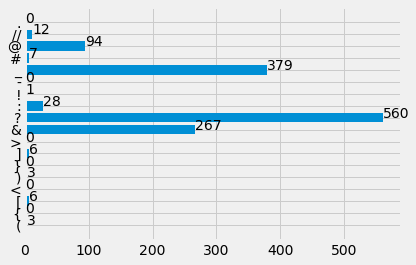

In [ ]:
labels = ['(','{','[','<',')','}',']','>','&', '?', ':', '!', '-', '_', '#', '@', '//', '.']
lengths = [len(BracketRound),len(BracketCurly),len(BracketSquare),len(BracketAngular),
           len(BracketRoundClose),len(BracketCurlyClose),len(BracketSquareClose),len(BracketAngularClose),
           len(AND), len(Question), len(Colon), len(Exclaim), len(Hyphen), len(Uscore), len(Hash), len(AT), 
           len(Dslash), len(Dots)]
plt.barh(labels, lengths)
for index, value in enumerate(lengths):
    plt.text(value, index, str(value))

In [ ]:
print("Max Length in URLs:",df['URL'].max)
print("Min Length in URLs:",df['URL'].min)

Max Length in URLs: <bound method Series.max of 0                                     http://dqdq168.com/
1       https://mypay.pictures/b/5ubou7a5o68bc7mkzt/vb...
2       http://ddlawpartners.com/language/Chase/aadda7...
3       http://www.alansihouse.com/collections/phone-c...
4       http://a7gsiwd.goodseo.tw/profile.html?countUs...
                              ...                        
2780               https://u1128706akc.ha004.t.justns.ru/
2781                        http://lloydsaccessgroup.com/
2782                         http://orangj.moonfruit.com/
2783         http://u1121816912.ha004.t.justns.ru/chnkpdr
2784                   http://vkgerlstop.ru/index.php?id=
Name: URL, Length: 2785, dtype: object>
Min Length in URLs: <bound method Series.min of 0                                     http://dqdq168.com/
1       https://mypay.pictures/b/5ubou7a5o68bc7mkzt/vb...
2       http://ddlawpartners.com/language/Chase/aadda7...
3       http://www.alansihouse.com/collections/phone

In [ ]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)

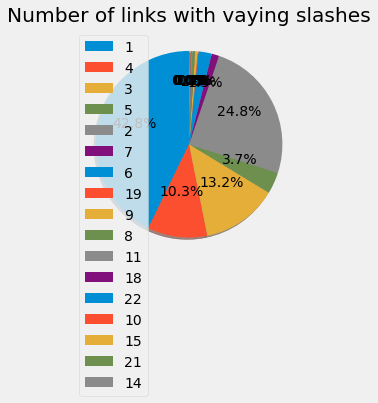

In [ ]:
Lengths = dict ()
Keys = list ()
Values = list ()
for i in df.index:
    count = -2
    for j in df['URL'][i]:
        if(j == '/'):
            count += 1
    if(str(count) in Lengths):
        Lengths[str(count)] = Lengths[str(count)] + 1
    else:
        Lengths[str(count)] = 1
        #Keys.append(str(count))
for i,j in Lengths.items():
    Keys.append(i)
    Values.append(j)

plt.pie(Values, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values))
plt.title("Number of links with vaying slashes")
plt.legend(Keys)
plt.show()

In [ ]:
A1 = Keys[0:6]
A2 = Keys[7:12]
A3 = Keys[13:]
DD1 = defaultdict(list)
DD2 = defaultdict(list)
DD3 = defaultdict(list)
for i,j in Lengths.items():
    if i in A1:
        DD1[i] = Lengths[i]
    elif i in A2:
        DD2[i] = Lengths[i]
    else:
        DD3[i] = Lengths[i]

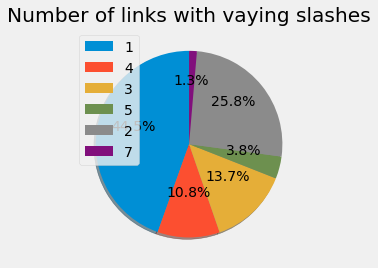

In [ ]:
Keys_DD1 = list()
Values_DD1 = list()
for i,j in DD1.items():
    Keys_DD1.append(i)
    Values_DD1.append(j)
plt.pie(Values_DD1, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD1)
plt.show()

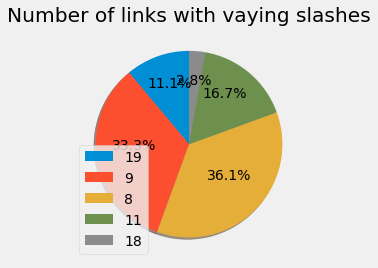

In [ ]:
Keys_DD2 = list()
Values_DD2 = list()
for i,j in DD2.items():
    Keys_DD2.append(i)
    Values_DD2.append(j)
plt.pie(Values_DD2, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD2)
plt.show()

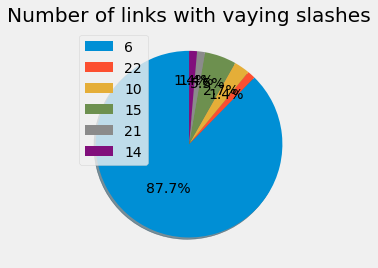

In [ ]:
Keys_DD3 = list()
Values_DD3 = list()
for i,j in DD3.items():
    Keys_DD3.append(i)
    Values_DD3.append(j)
plt.pie(Values_DD3, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DD1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DD3)
plt.show()

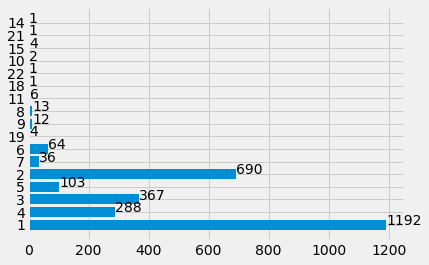

In [ ]:
plt.barh(Keys, Values)
for index, value in enumerate(Values):
    plt.text(value, index, str(value))

In [ ]:
def is_registered(domain_name):
    """A function that returns a boolean indicating whether a `domain_name` is registered"""
    try:
        w = whois.whois(domain_name)
    except Exception:
        return False
    else:
        return w.domain_name, w.creation_date, w.expiration_date

In [ ]:
link_count = 0
DD = defaultdict(list)
DD_names = defaultdict(list)
for i in range(len(df)):
    #start_time =time.time()
    #while ((time.time() - start_time) < 5):
    count = 0
    with open('/content/drive/MyDrive/Cronos_Test1/'+df['Filename'][i]) as fp:
        bSoup = BeautifulSoup(fp, 'html.parser')
    links1_list = bSoup.find_all('a')
    links2_list = bSoup.find_all('alt')
    links3_list = bSoup.find_all('src')
    links4_list = bSoup.find_all('link')
    link_count+=1
    for link in links1_list+links2_list+links3_list+links4_list:
        if 'href' in link.attrs:
            if(str(link.attrs['href'])==""):
                count+=1
    if(count != 0):
        if(count in DD):
            DD[count] += 1
        else:
            DD[count] = 1
        print(df['URL'][i], count)
        DD_names[df['URL'][i]] = count
    fp.close()

http://dqdq168.com/ 3
http://ddlawpartners.com/language/Chase/aadda70acb8c9d376e6c5e5f85664905 21
http://wbstormer.com/clow/dsbanknew/bg-BG/index.html?id=d60b548fba5d0943d3763d9b5e5530b8country=Bg 3
https://polymercenter.com.ua/Service/Ameli/ 1
https://chronopost-colis.livraisonclient.com/Remboursement/ 6
https://www.paliyabrothersinterior.com/granulla/DH2tAyUe9AsUx7b649 8
http://geminiirg.co.uk/zimbra/Zimbra%20main/3152253d53b52fee0f867c9d1 1
https://akassa.link/b/ditcaq017joj816vg/btbh/?order_id=48999029&order;_idNew=48999029 1
https://panelweb-4cae2.web.app/webmail-2096/index.htm 11
https://galconotary.com/612c210cf4c6e814dcf8d8fce583938e/verify.php?country_x=-&ACCT;_x=ID-PPL=PA32424.66.0.109=ScrPg=7a5e003d729e8d8dfd02ac627ec8aa2761b61909349cdf2e95c7e8092f7384a0S=$1$D.6XocW5$cf9ibs/SJECwtsrCmefZb1FyG42dKb0x8JptM7mO1iPlkBqaeghQrw6oLD3cREXVU5svTfnAHNSZ9IYCzjWuvEUkygQeZbSR8Or9PdIVmw64jqiC2TLG1oWJHt7AKcaXDxnBu0YlNMpsz35Ffh53297468219 19
https://polkastarter.walletconnect-support.net/ 2


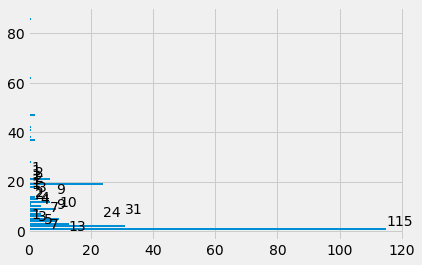

In [ ]:
Keys_1 = list()
Values_1 = list()
for i,j in DD.items():
    Keys_1.append(i)
    Values_1.append(j)
plt.barh(Keys_1, Values_1)
for index, value in enumerate(Values_1):
    plt.text(value, index, str(value))

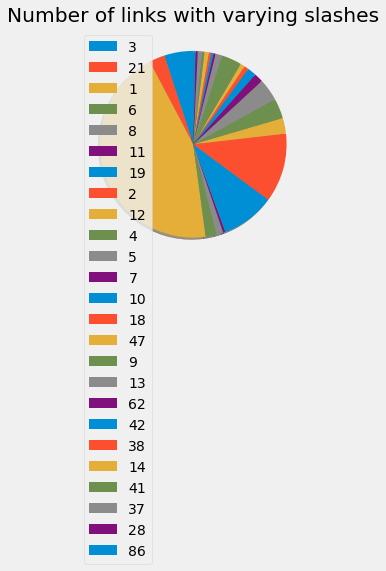

In [ ]:
plt.pie(Values_1, shadow = True, startangle = 90)
plt.title("Number of links with varying slashes")
plt.legend(Keys_1)
plt.show()

<BarContainer object of 25 artists>

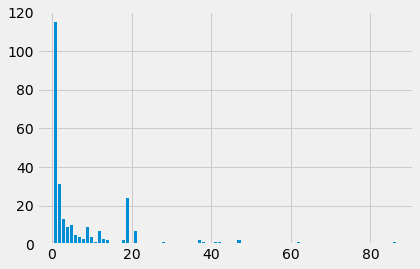

In [ ]:
plt.bar(Keys_1, Values_1)

In [ ]:
import plotly.express as px
import pandas as pd
#df = pd.Series(Keys, Values).to_frame()
df = pd.DataFrame(list(zip(Keys, Values)),
               columns =['Keys', 'Values'])
fig = px.line_polar(df, r='Keys', theta='Values', line_close=True)
fig.show()

In [ ]:
dmoz = pd.read_csv('/content/drive/MyDrive/DMOZ.csv')
dmoz

,Unnamed: 0,URL
0,0,http://www.liquidgeneration.com/
1,1,http://www.onlineanime.org/
2,2,http://www.ceres.dti.ne.jp/~nekoi/SENNO/SENfir...
3,3,http://www.galeon.com/kmh/
4,4,http://archive.rhps.org/fritters/yui/index.html
...,...,...
1256549,1256549,http://www.maxpreps.com/
1256550,1256550,http://www.myscore.com/
1256551,1256551,http://sportsillustrated.cnn.com/highschool
1256552,1256552,http://rss.cnn.com/rss/si_highschool?format=xml


In [ ]:
BracketRound_1 = list ()
for i in dmoz.index:
    if("(" in dmoz['URL'][i]):
        BracketRound_1.append(dmoz['URL'][i])

In [ ]:
BracketCurly_1 = list ()
for i in dmoz.index:
    if("{" in dmoz['URL'][i]):
        BracketCurly_1.append(dmoz['URL'][i])

In [ ]:
BracketSquare_1 = list ()
for i in dmoz.index:
    if('[' in dmoz['URL'][i]):
        BracketSquare_1.append(dmoz['URL'][i])

In [ ]:
BracketAngular_1 = list ()
for i in dmoz.index:
    if('<' in dmoz['URL'][i]):
        BracketAngular_1.append(dmoz['URL'][i])

In [ ]:
BracketRoundClose_1 = list ()
for i in dmoz.index:
    if(")" in dmoz['URL'][i]):
        BracketRoundClose_1.append(dmoz['URL'][i])

In [ ]:
BracketCurlyClose_1 = list ()
for i in dmoz.index:
    if("}" in dmoz['URL'][i]):
        BracketCurlyClose_1.append(dmoz['URL'][i])

In [ ]:
BracketSquareClose_1 = list ()
for i in dmoz.index:
    if(']' in dmoz['URL'][i]):
        BracketSquareClose_1.append(dmoz['URL'][i])

In [ ]:
BracketAngularClose_1 = list ()
for i in dmoz.index:
    if('>' in dmoz['URL'][i]):
        BracketAngularClose_1.append(dmoz['URL'][i])

In [ ]:
AND_1 = list ()
for i in dmoz.index:
    if("&" in dmoz['URL'][i]):
        AND_1.append(dmoz['URL'][i])

In [ ]:
QUESTION_1 = list ()
for i in dmoz.index:
    if("?" in dmoz['URL'][i]):
        QUESTION_1.append(dmoz['URL'][i])

In [ ]:
COLON_1 = list ()
for i in dmoz.index:
    if(dmoz['URL'][i].count(':') > 1):
        COLON_1.append(dmoz['URL'][i])

In [ ]:
EXCLAIM_1 = list ()
for i in dmoz.index:
    if("!" in dmoz['URL'][i]):
        EXCLAIM_1.append(dmoz['URL'][i])

In [ ]:
domains_1=[]
for i in dmoz.URL:
  domains_1.append(extract_domain(i))

Checking for prefix/suffix in domain for legitimate URLs i.e. hyphen in the domains

In [ ]:
HYPHEN_1 = list ()
for i in dmoz.index:
    if("-" in domains_1[i]):
        HYPHEN_1.append(dmoz['URL'][i])

In [ ]:
USCORE_1 = list ()
for i in dmoz.index:
    if("_" in dmoz['URL'][i]):
        USCORE_1.append(dmoz['URL'][i])

In [ ]:
HASH_1 = list ()
for i in dmoz.index:
    if("#" in dmoz['URL'][i]):
        HASH_1.append(dmoz['URL'][i])

In [ ]:
AT_1 = list ()
for i in dmoz.index:
    if("@" in dmoz['URL'][i]):
        AT_1.append(dmoz['URL'][i])

In [ ]:
DSLASH_1 = list()
for i in dmoz.index:
    if(dmoz['URL'][i].count('//') > 1):
        Dslash.append(dmoz['URL'][i])

In [ ]:
DOTS_1 = list()
for i in dmoz.index:
    if(domains_1[i].count('.') > 1):
        Dots.append(dmoz['URL'][i])

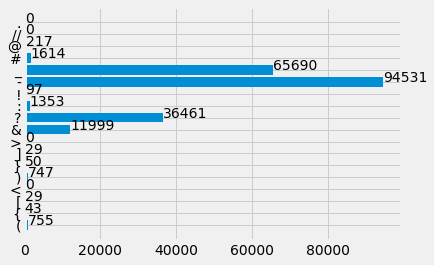

In [ ]:
labels_dmoz = ['(','{','[','<',')','}',']','>','&', '?', ':', '!', '-', '_', '#', '@', '//', '.']
lengths_dmoz = [len(BracketRound_1),len(BracketCurly_1),len(BracketSquare_1),len(BracketAngular_1),
           len(BracketRoundClose_1),len(BracketCurlyClose_1),len(BracketSquareClose_1),len(BracketAngularClose_1),len(AND_1), len(QUESTION_1), len(COLON_1), len(EXCLAIM_1), len(HYPHEN_1), len(USCORE_1), len(HASH_1), len(AT_1), len(DSLASH_1), len(DOTS_1)]
plt.barh(labels_dmoz, lengths_dmoz)
for index, value in enumerate(lengths_dmoz):
    plt.text(value, index, str(value))

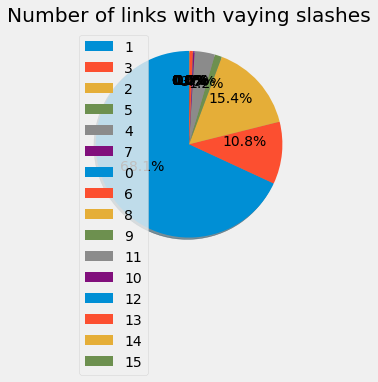

In [ ]:
Lengths_dmoz = defaultdict()
Keys_dmoz = list ()
Values_dmoz = list ()
for i in dmoz.index:
    count = -2
    for j in dmoz['URL'][i]:
        if(j == '/'):
            count += 1
    if((str(count) in Lengths_dmoz)):
        Lengths_dmoz[str(count)] = Lengths_dmoz[str(count)] + 1
    else:
        Lengths_dmoz[str(count)] = 1
del Lengths_dmoz["-2"]
for i,j in Lengths_dmoz.items():
    Keys_dmoz.append(i)
    Values_dmoz.append(j)

plt.pie(Values_dmoz, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_dmoz))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_dmoz)
plt.show()

In [ ]:
Ad1 = Keys_dmoz[0:6]
Ad2 = Keys_dmoz[7:12]
Ad3 = Keys_dmoz[13:]
DDd1 = defaultdict(list)
DDd2 = defaultdict(list)
DDd3 = defaultdict(list)
for i,j in Lengths_dmoz.items():
    if i in Ad1:
        DDd1[i] = Lengths_dmoz[i]
    elif i in Ad2:
        DDd2[i] = Lengths_dmoz[i]
    else:
        DDd3[i] = Lengths_dmoz[i]

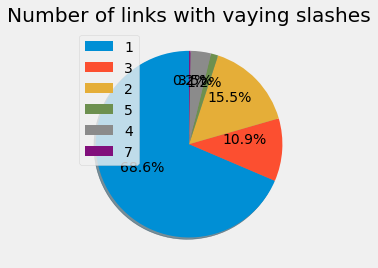

In [ ]:
Keys_DDd1 = list()
Values_DDd1 = list()
for i,j in DDd1.items():
    Keys_DDd1.append(i)
    Values_DDd1.append(j)
plt.pie(Values_DDd1, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DDd1))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DDd1)
plt.show()

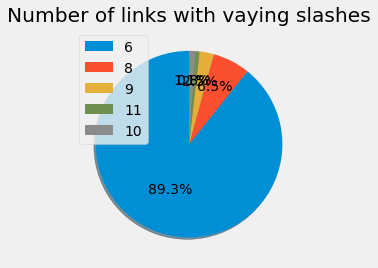

In [ ]:
Keys_DDd2 = list()
Values_DDd2 = list()
for i,j in DDd2.items():
    Keys_DDd2.append(i)
    Values_DDd2.append(j)
plt.pie(Values_DDd2, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DDd2))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DDd2)
plt.show()

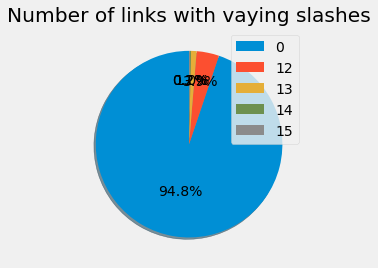

In [ ]:
Keys_DDd3 = list()
Values_DDd3 = list()
for i,j in DDd3.items():
    Keys_DDd3.append(i)
    Values_DDd3.append(j)
plt.pie(Values_DDd3, shadow = True, startangle = 90, autopct = lambda pct: func(pct, Values_DDd3))
plt.title("Number of links with vaying slashes")
plt.legend(Keys_DDd3)
plt.show()

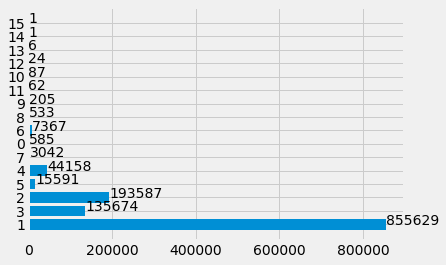

In [ ]:
plt.barh(Keys_dmoz, Values_dmoz)
for index, value in enumerate(Values_dmoz):
    plt.text(value, index, str(value))

In [ ]:
3/2785

0.0010771992818671453

In [ ]:
29/len(dmoz)

2.3078992227950412e-05